# Preprocessing


In [1]:
import pandas as pd 
import numpy as np
import warnings

data = pd.read_csv(r"C:\Users\Lenovo\Downloads\swan\Swarm_Behaviour.csv")
warnings.filterwarnings('ignore')

checking for imbalance

In [2]:
data['Swarm_Behaviour'].value_counts()

0.0    15355
1.0     7954
Name: Swarm_Behaviour, dtype: int64

### Undersampling

In [3]:
d1 = data[data['Swarm_Behaviour'] == 0]
d2 = data[data['Swarm_Behaviour'] == 1]

In [4]:
d1 = d1[:7954]
data = pd.concat([d1,d2]).sample(frac=1)

### Splitting Data

In [5]:
a = list(data.columns)
a.remove('Swarm_Behaviour')
x = data[a]
y = data['Swarm_Behaviour']

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

# Training the Models

### Logistic Regression

In [7]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [8]:
log_pred = log_reg.predict(x_test)

### Naive Bayes Classifier

In [9]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [10]:
nav_pred = classifier.predict(x_test)

### K-Nearest Neighbour

In [11]:
from sklearn.neighbors import KNeighborsClassifier

k_model = KNeighborsClassifier(n_neighbors=3)

k_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
k_pred = k_model.predict(x_test)

### Decision Tree(Entropy)

In [13]:
from sklearn.tree import DecisionTreeClassifier
d1_model = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [14]:
d1_model.fit(x_train,y_train)
d1_pred = d1_model.predict(x_test)

### Decision Tree(Gini)

In [15]:
from sklearn.tree import DecisionTreeClassifier
d2_model = DecisionTreeClassifier(criterion='gini', random_state=0)

In [16]:
d2_model.fit(x_train,y_train)
d2_pred = d2_model.predict(x_test) 

# Comparing Accuracy

### Logistic Regression

In [17]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(y_test,log_pred))    

              precision    recall  f1-score   support

         0.0       0.94      0.87      0.90      2001
         1.0       0.88      0.94      0.91      1976

    accuracy                           0.91      3977
   macro avg       0.91      0.91      0.91      3977
weighted avg       0.91      0.91      0.91      3977



### Naive Bayes Classifier

In [19]:
print(classification_report(y_test,nav_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.20      0.32      2001
         1.0       0.54      0.95      0.69      1976

    accuracy                           0.57      3977
   macro avg       0.68      0.58      0.51      3977
weighted avg       0.68      0.57      0.50      3977



### K-Nearest Neighbours

In [20]:
print(classification_report(y_test,k_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.88      0.89      2001
         1.0       0.88      0.91      0.89      1976

    accuracy                           0.89      3977
   macro avg       0.89      0.89      0.89      3977
weighted avg       0.89      0.89      0.89      3977



### Decision Tree(Entropy)

In [21]:
print(classification_report(y_test,d1_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88      2001
         1.0       0.88      0.86      0.87      1976

    accuracy                           0.87      3977
   macro avg       0.87      0.87      0.87      3977
weighted avg       0.87      0.87      0.87      3977



### Decision Tree(Gini)

In [22]:
print(classification_report(y_test,d2_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87      2001
         1.0       0.88      0.85      0.87      1976

    accuracy                           0.87      3977
   macro avg       0.87      0.87      0.87      3977
weighted avg       0.87      0.87      0.87      3977



## Cross Validation Results

In [23]:
from sklearn.model_selection import cross_val_score,KFold

kf = KFold(n_splits=10)

log = cross_val_score(log_reg,x,y,cv=kf,scoring="f1")
naive = cross_val_score(classifier,x,y,cv=kf,scoring="f1")
knn = cross_val_score(k_model,x,y,cv=kf,scoring="f1")
dtree_e = cross_val_score(d1_model,x,y,cv=kf,scoring="f1")
dtree_g = cross_val_score(d2_model,x,y,cv=kf,scoring="f1")

In [30]:
log = log.mean()
naive = naive.mean()
knn = knn.mean()
dtree_e = dtree_e.mean()
dtree_g = dtree_g.mean()

In [52]:
l1 = [log,knn,dtree_g,dtree_e,naive]
l2 = ['Log Reg','KNN','DTree Gini','DTree Entropy','Naive Bayes']
result = pd.DataFrame(l1)
result.index = l2
result.columns=['Accuracy']

### Comparing Models

In [53]:
result


,Accuracy
Log Reg,0.910429
KNN,0.893920
DTree Gini,0.866036
DTree Entropy,0.865014
Naive Bayes,0.689173


(0.65, 1.0)

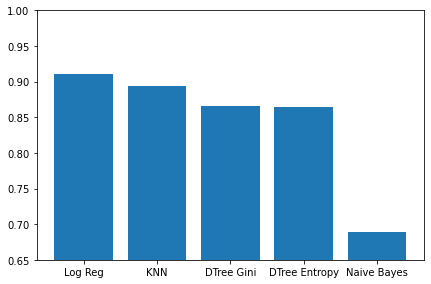

In [58]:
import matplotlib.pyplot as plt 

plt.bar(l2,l1)
plt.tight_layout()
plt.ylim(0.65,1)